In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno


In [3]:
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [4]:
df = pd.read_csv(r"C:\Saraswathy\Webinars\FDP DS Kashmir\Project\project_data - project_data.csv")

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
# Missing Value Treatment

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

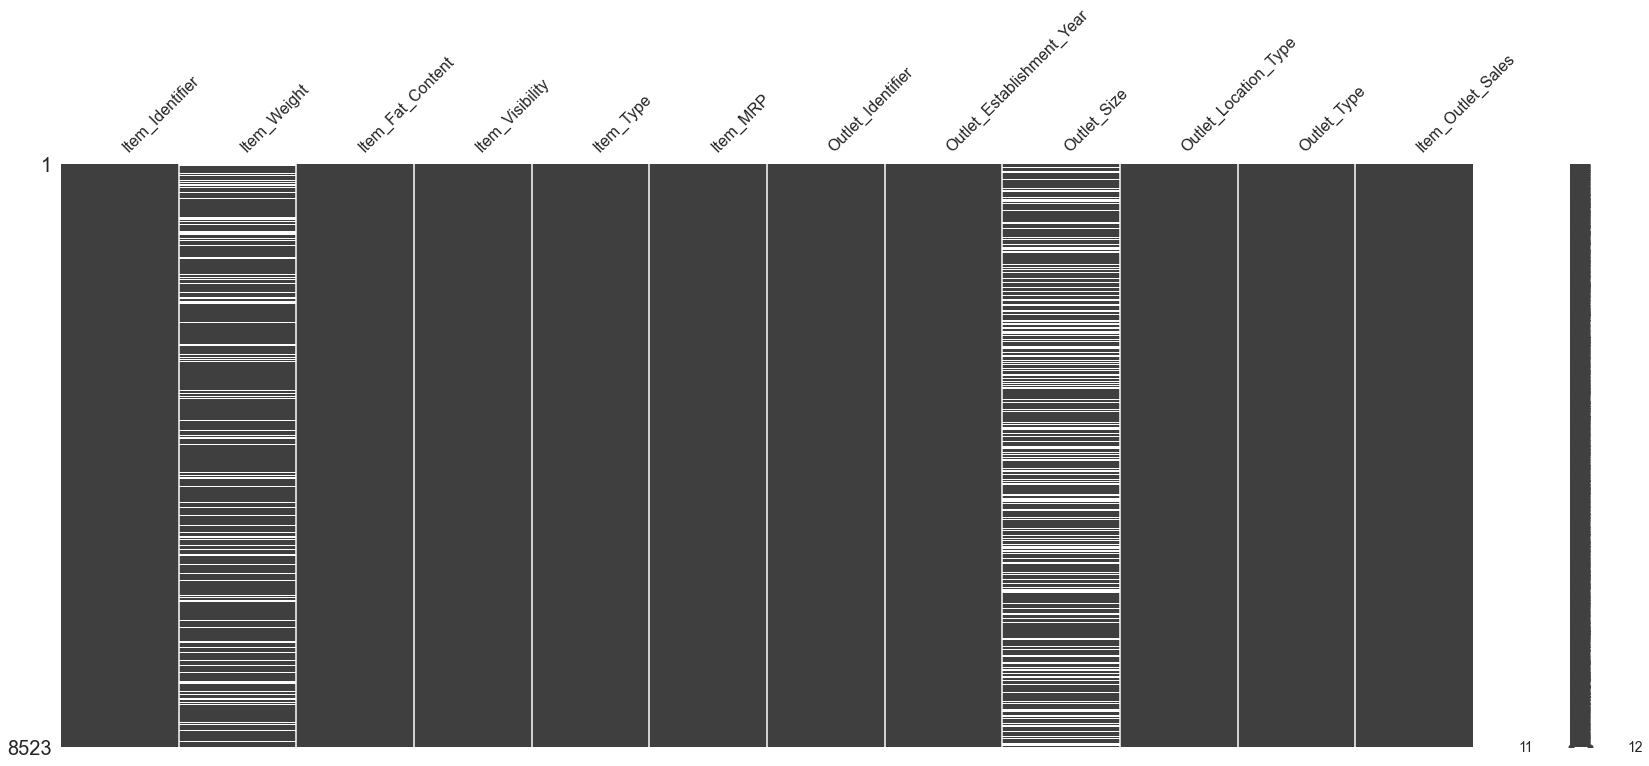

In [12]:
msno.matrix(df)

In [13]:
df.fillna(df.median(), inplace=True)

In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df.Outlet_Size.fillna("Medium" , inplace=True)

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
# Univariate Analysis

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
# Analysing Numeric Features

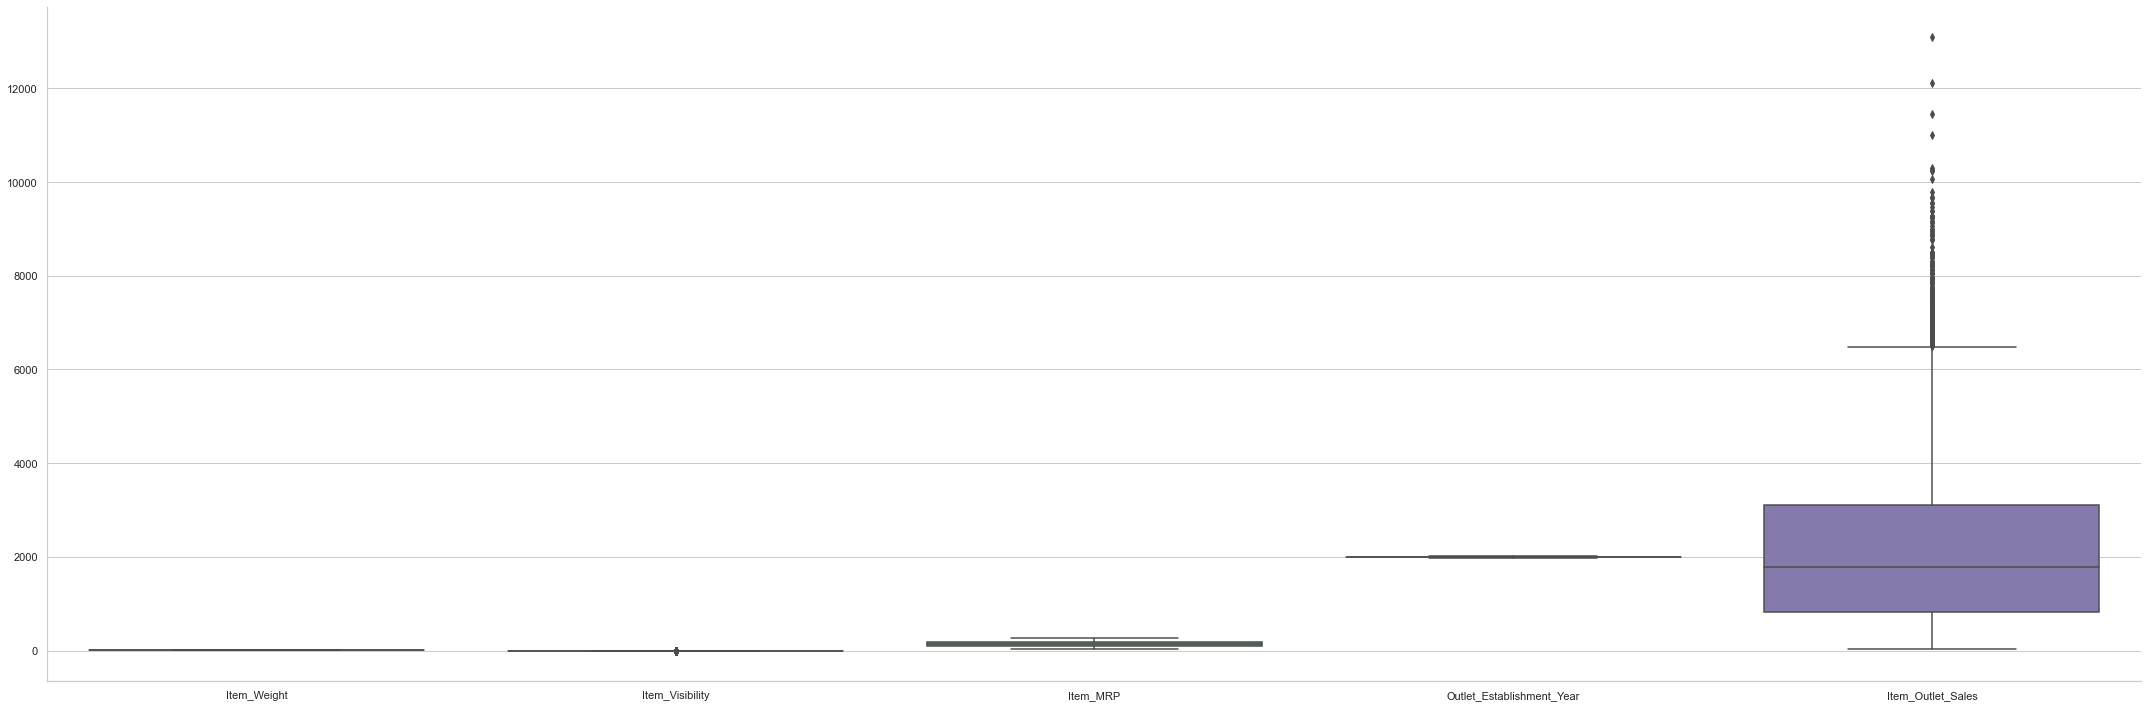

In [21]:
sns.factorplot(data=df, kind='box',size=10,aspect=3)

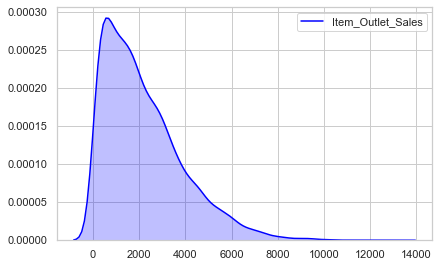

In [22]:
sns.kdeplot(df['Item_Outlet_Sales'],shade=True,color='blue')

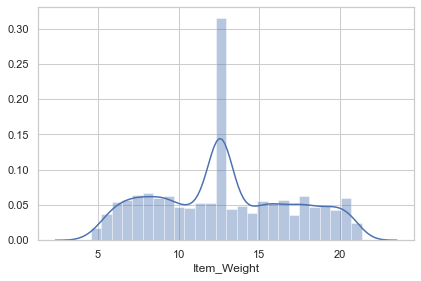

In [23]:
sns.distplot(df.Item_Weight)

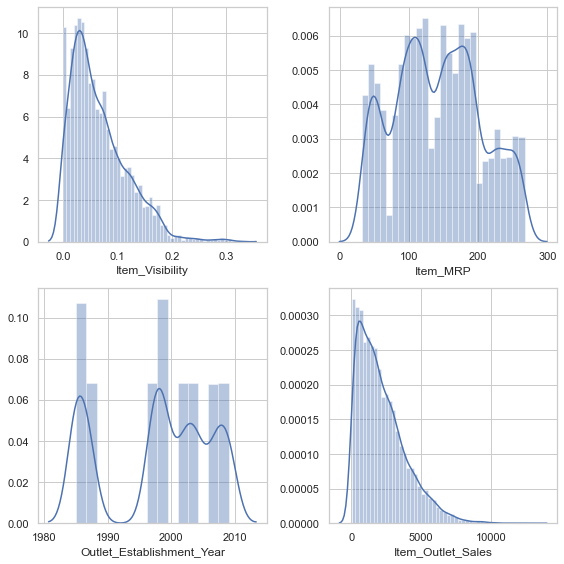

In [24]:
fig,ax = plt.subplots(2,2,figsize=(8,8))

sns.distplot(df['Item_Visibility'],ax=ax[0,0])
sns.distplot(df['Item_MRP'], ax = ax[0,1])
sns.distplot(df['Outlet_Establishment_Year'], ax=ax[1,0])
sns.distplot(df['Item_Outlet_Sales'],ax=ax[1,1])
plt.tight_layout()
plt.show()

In [25]:
# Analysing Categorical Features

In [26]:
catg_df = df.select_dtypes(include='object')

In [27]:
catg_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

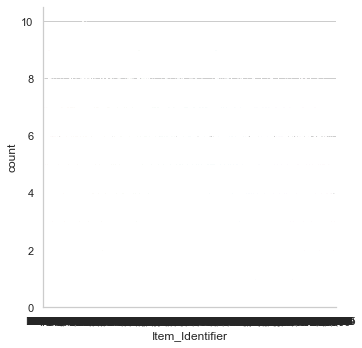

In [28]:
sns.catplot(x='Item_Identifier', data =df, kind='count')

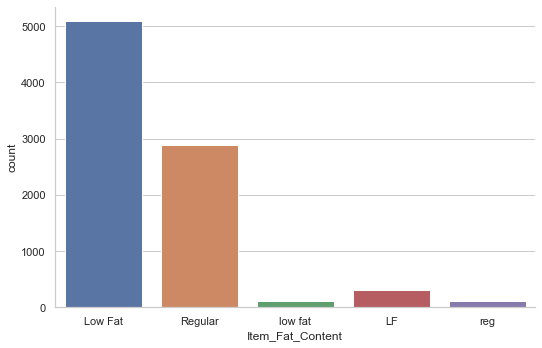

In [30]:
sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x='Item_Fat_Content')

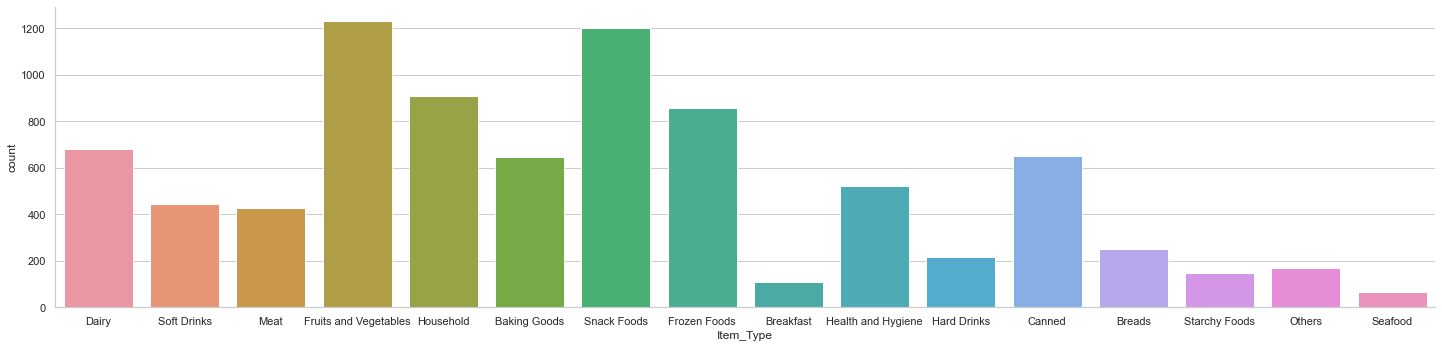

In [31]:
sns.catplot(x='Item_Type',height=5,aspect=4,data=df,kind='count')

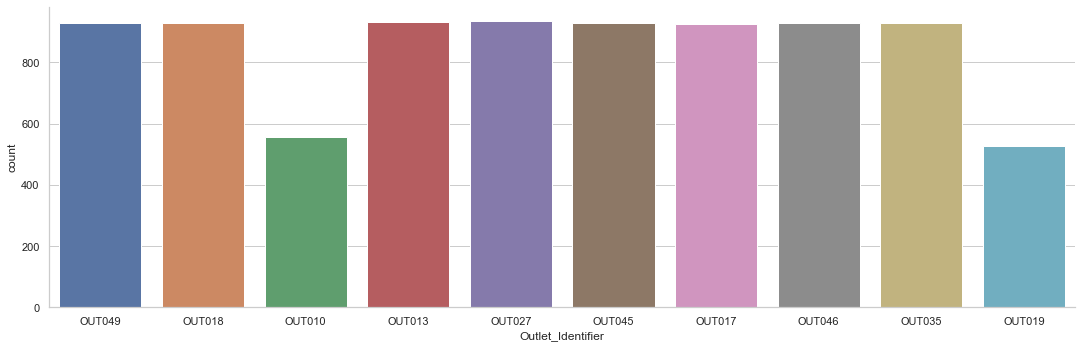

In [32]:
sns.catplot(x='Outlet_Identifier', height=5, aspect=3,data=df,kind='count')

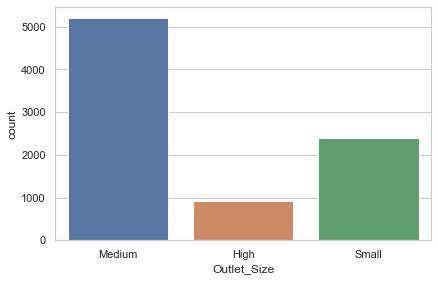

In [33]:
sns.countplot(x='Outlet_Size', data=df)

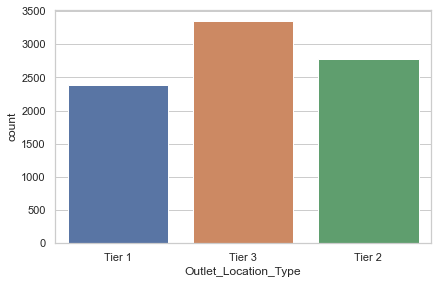

In [34]:
sns.countplot(x='Outlet_Location_Type', data = df)

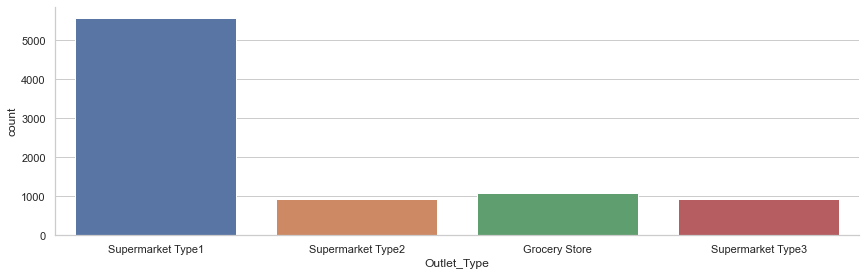

In [35]:
sns.catplot(x='Outlet_Type' , aspect = 3, height = 4, data = df, kind = 'count')

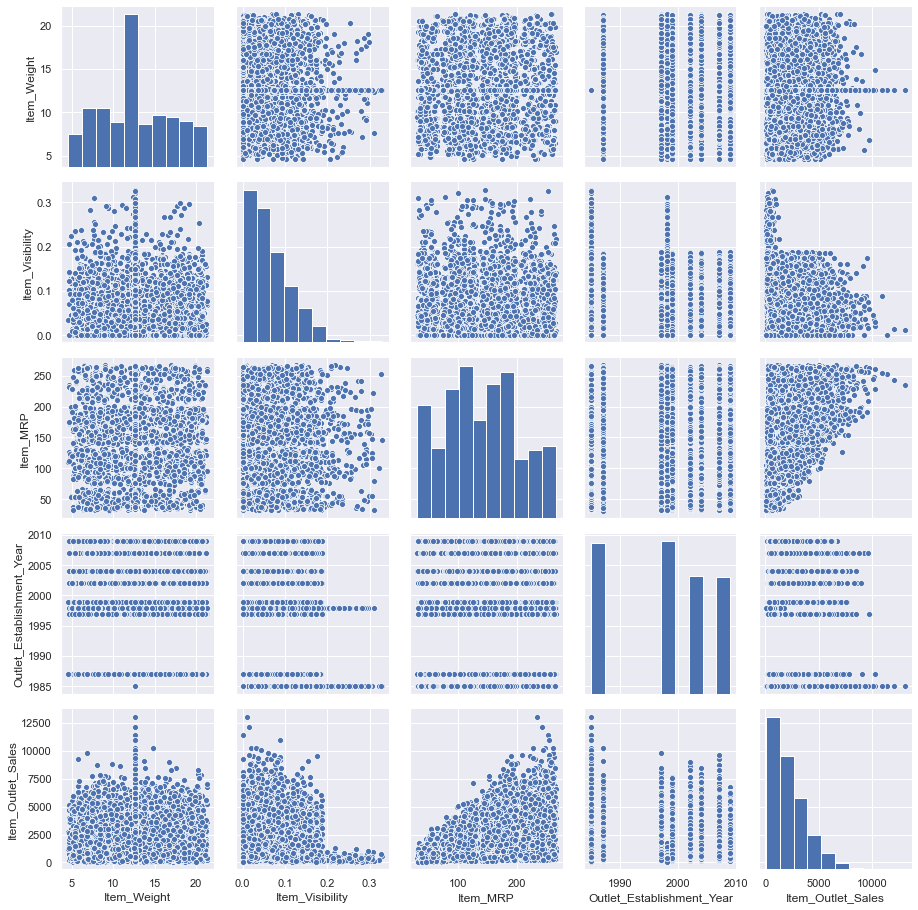

In [37]:
sns.set()

sns.pairplot(df)

plt.show();

In [41]:
#corelation matrix
cor_mat= df.corr()


In [43]:
# Feature Selection

In [45]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

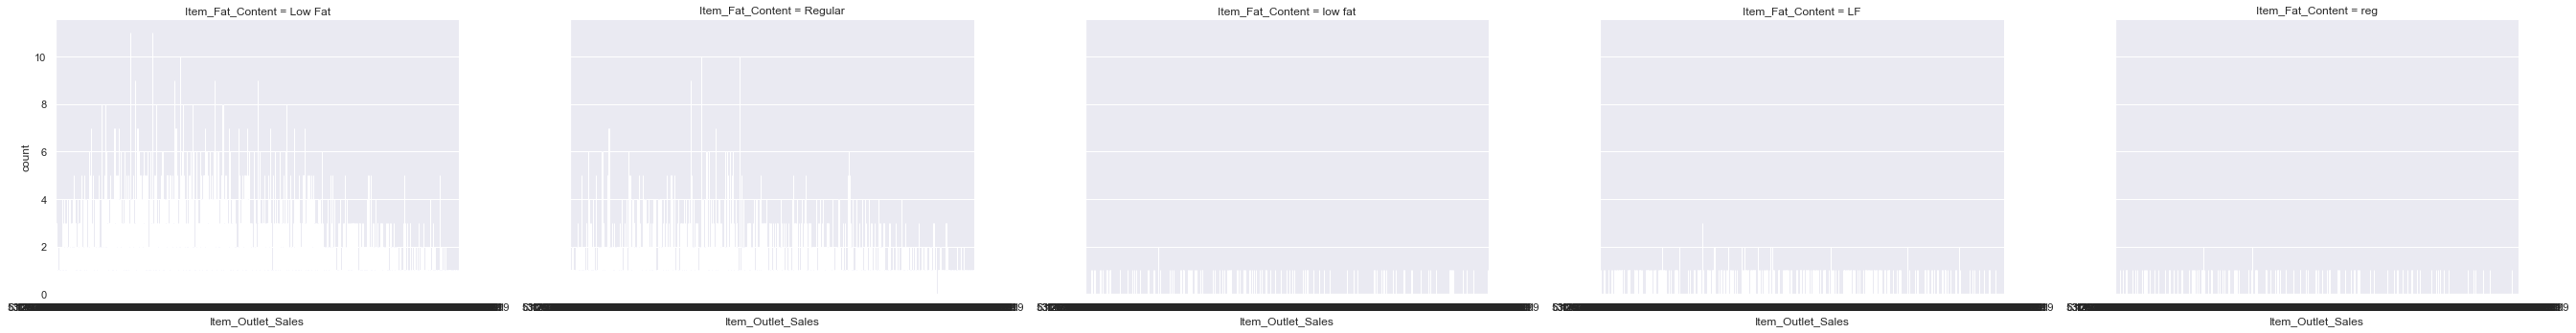

In [50]:
sns.factorplot(data =df, kind='count', x='Item_Outlet_Sales', col = 'Item_Fat_Content', size=5,aspect=1.5, color='blue')

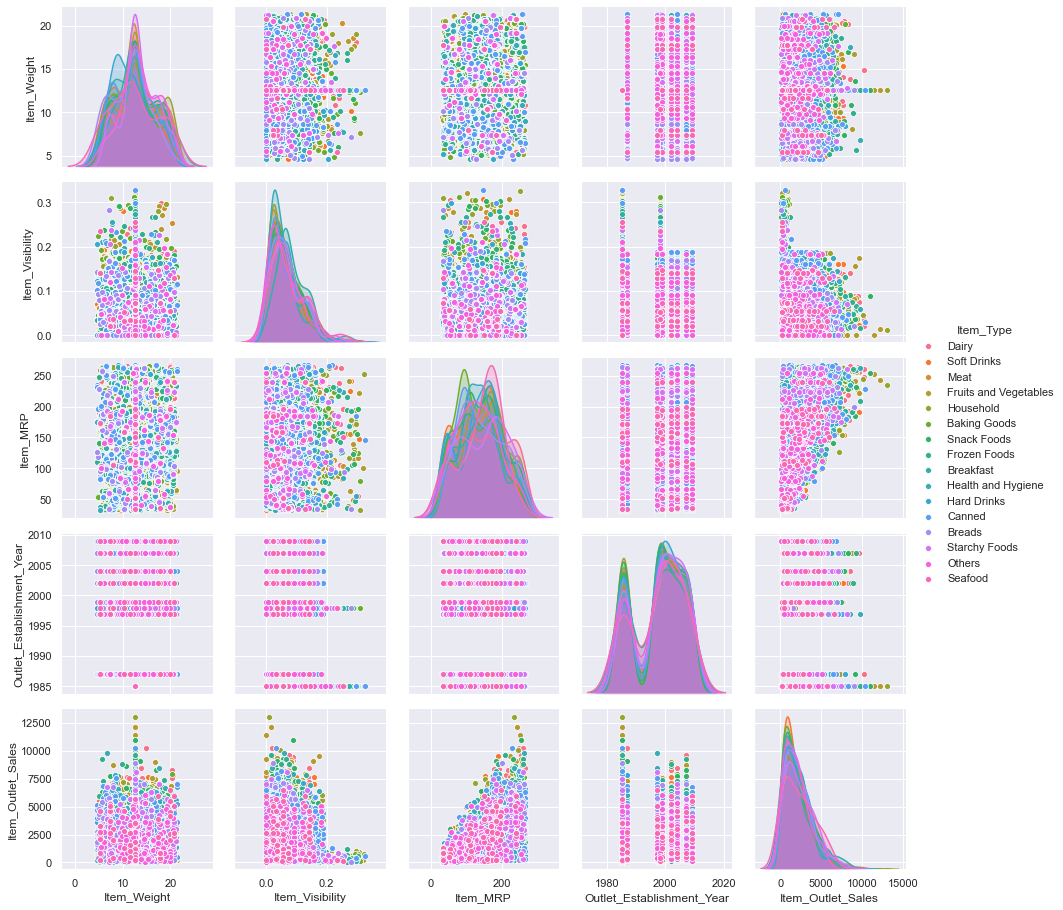

In [49]:
sns.set()

sns.pairplot(df, hue = 'Item_Type')

plt.show();

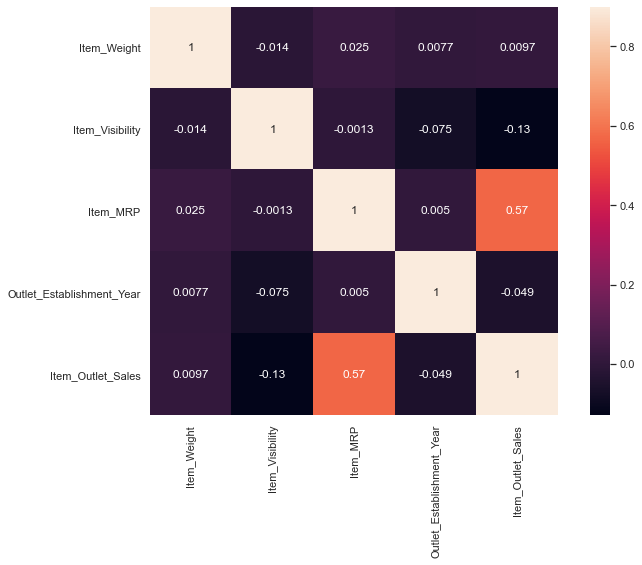

In [48]:
corr_matrix = df.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot=True,cbar=True)